<a href="https://colab.research.google.com/github/pinknemo452/cv_hw_1/blob/main/Sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install memory_profiler

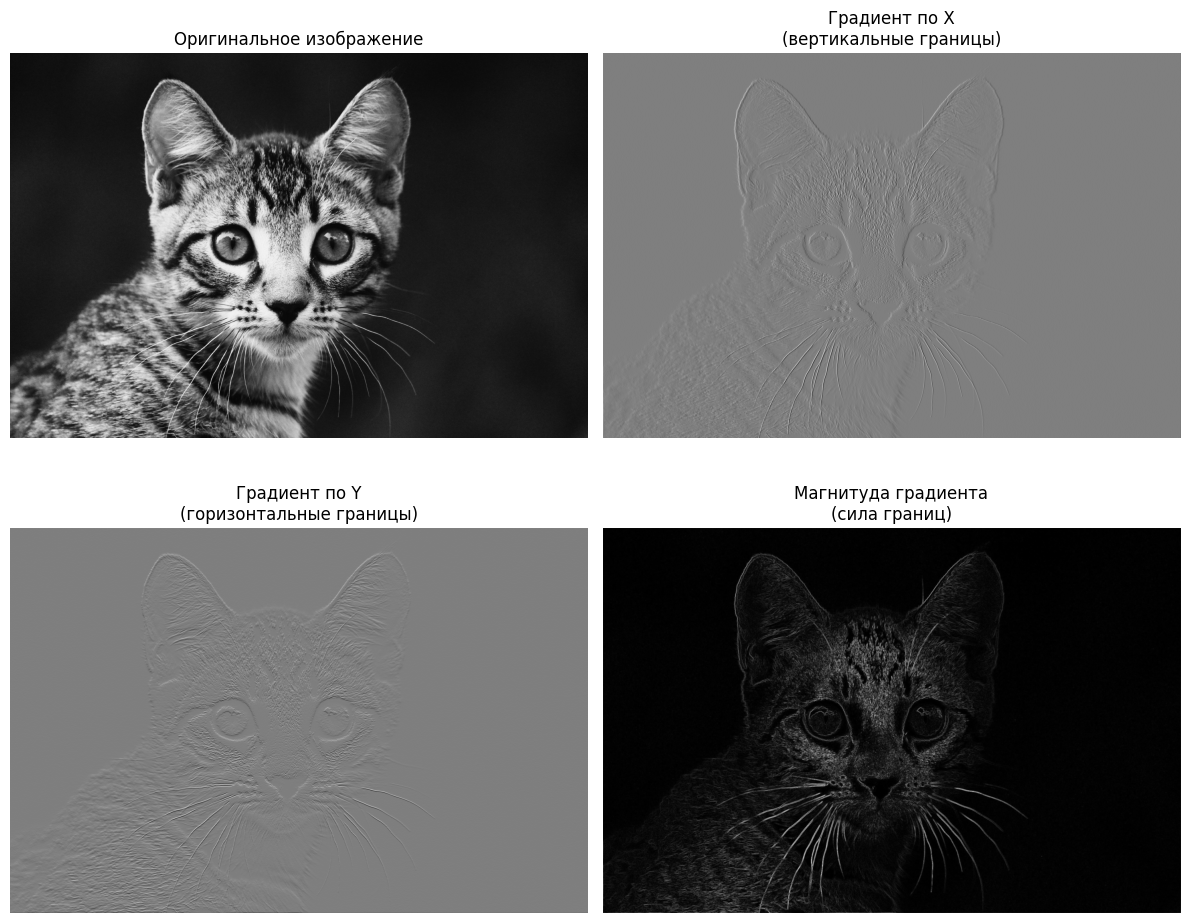

In [ ]:
#Нативный способ
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import psutil
import os

class Sobel:
    def __init__(self):
        self.kernel_x = np.array([
            [-1, 0, 1],
            [-2, 0, 2],
            [-1, 0, 1]
        ], dtype=np.float32)

        self.kernel_y = np.array([
            [-1, -2, -1],
            [0, 0, 0],
            [1, 2, 1]
        ], dtype=np.float32)

    def apply_sobel(self, image):
        if len(image.shape) == 3:
            image = np.mean(image, axis=2).astype(np.float32)

        h, w = image.shape

        grad_x = np.zeros((h, w), dtype=np.float32)
        grad_y = np.zeros((h, w), dtype=np.float32)

        padded = np.pad(image, 1, mode='constant', constant_values=0)

        for i in range(1, h+1):
            for j in range(1, w+1):

                window = padded[i-1:i+2, j-1:j+2]

                grad_x[i-1, j-1] = np.sum(window * self.kernel_x)
                grad_y[i-1, j-1] = np.sum(window * self.kernel_y)

        magnitude = np.sqrt(grad_x**2 + grad_y**2)
        direction = np.arctan2(grad_y, grad_x)

        return grad_x, grad_y, magnitude, direction

sobel = Sobel()
im = Image.open('meow.jpg').convert('L')
im_array = np.array(im, dtype=np.float64)

process = psutil.Process(os.getpid())
memory_before = process.memory_info().rss / 1024 / 1024

start_time = time.time()

grad_x, grad_y, magnitude, direction = sobel.apply_sobel(im_array)

end_time = time.time()
memory_after = process.memory_info().rss / 1024 / 1024

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(im, cmap='gray')
axes[0, 0].set_title('Оригинальное изображение')
axes[0, 0].axis('off')

axes[0, 1].imshow(grad_x, cmap='gray')
axes[0, 1].set_title('Градиент по X\n(вертикальные границы)')
axes[0, 1].axis('off')

axes[1, 0].imshow(grad_y, cmap='gray')
axes[1, 0].set_title('Градиент по Y\n(горизонтальные границы)')
axes[1, 0].axis('off')

axes[1, 1].imshow(magnitude, cmap='gray')
axes[1, 1].set_title('Магнитуда градиента\n(сила границ)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()



In [ ]:
execution_time = end_time - start_time
memory_used = memory_after - memory_before

print(f"  Время: {execution_time:.4f} сек")
print(f"  Использовано памяти: {memory_used:.2f} MB")

  Время: 39.9002 сек
  Использовано памяти: 21.38 MB


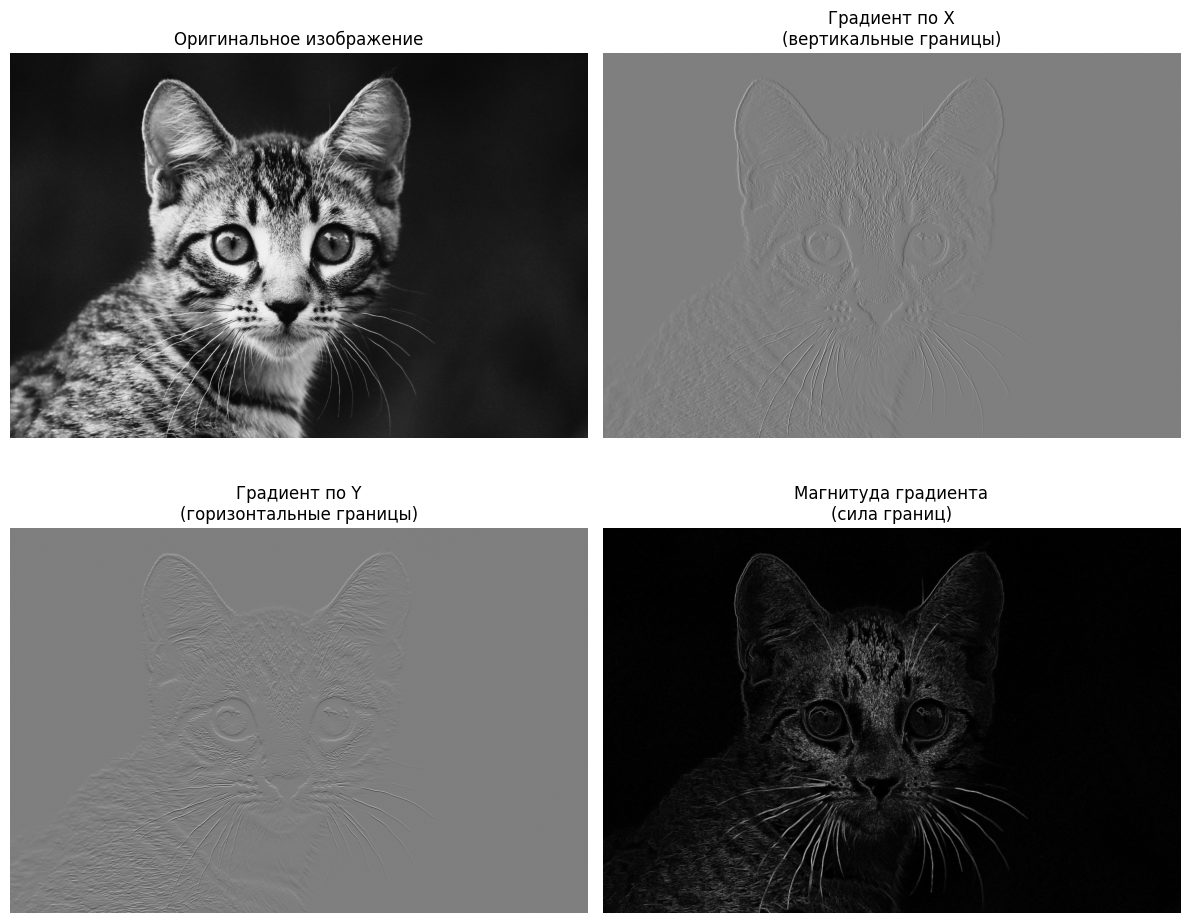

In [ ]:
#Библиотечный способ
import cv2

image_array = np.array(im)

process = psutil.Process(os.getpid())
memory_before = process.memory_info().rss / 1024 / 1024

start_time = time.time()

sobel_x = cv2.Sobel(image_array, cv2.CV_32F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image_array, cv2.CV_32F, 0, 1, ksize=3)
magnitude = cv2.magnitude(sobel_x, sobel_y)

end_time = time.time()
memory_after = process.memory_info().rss / 1024 / 1024

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(image_array, cmap='gray')
axes[0, 0].set_title('Оригинальное изображение')
axes[0, 0].axis('off')

axes[0, 1].imshow(sobel_x, cmap='gray')
axes[0, 1].set_title('Градиент по X\n(вертикальные границы)')
axes[0, 1].axis('off')

axes[1, 0].imshow(sobel_y, cmap='gray')
axes[1, 0].set_title('Градиент по Y\n(горизонтальные границы)')
axes[1, 0].axis('off')

axes[1, 1].imshow(magnitude, cmap='gray')
axes[1, 1].set_title('Магнитуда градиента\n(сила границ)')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
execution_time = end_time - start_time
memory_used = memory_after - memory_before

print(f"  Время: {execution_time:.4f} сек")
print(f"  Использовано памяти: {memory_used:.2f} MB")

  Время: 0.0169 сек
  Использовано памяти: 0.12 MB
